# Pneumonia Detection

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = '../input/chest-xray-pneumonia/chest_xray/train' #path of training data
test_dir = '../input/chest-xray-pneumonia/chest_xray/test' #path of testing data
validation_dir = '../input/chest-xray-pneumonia/chest_xray/val' #path of validation data

In [3]:
img_size = 150 #initializing the size of the image
data = [] #empty list to store the data
assign_dict = {"NORMAL":0,"PNEUMONIA":1} #our labels

def load_data(directory): #this method will help in reading our data from the directories
    for sub_directory in os.listdir(directory):
        if sub_directory == "NORMAL":
            inner_directory = os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img = cv2.imread(os.path.join(inner_directory,i),0)
                img = cv2.resize(img,(img_size,img_size))
                data.append([img,assign_dict[sub_directory]])
                
        if sub_directory == "PNEUMONIA":
            inner_directory = os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img = cv2.imread(os.path.join(inner_directory,i),0)
                img = cv2.resize(img,(img_size,img_size))
                data.append([img,assign_dict[sub_directory]])
                
    return np.array(data) #converting our data into an array

In [4]:
train_data = load_data(train_dir) #getting our training data in array 
test_data = load_data(test_dir) #getting our testing data in array
val_data = load_data(validation_dir) #getting our validation data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [5]:
print(train_data.shape) #printing the shape of our training, validation and testing data
print(test_data.shape)
print(val_data.shape)

(5216, 2)
(5840, 2)
(5856, 2)


In [6]:
#printing the total images present in our training data along with number of images in each category
total_images = 0 
num_normal = 0
num_pneumonia = 0
normal = []
pneumonia = []
for i in train_data:
    if i[1]==0:
        total_images +=1
        num_normal+=1
        normal.append(i[0])
    else:
        total_images+=1
        num_pneumonia+=1
        pneumonia.append(i[0])
        
print("Total Images = ",total_images)
print("Total Normal Images = ",num_normal)
print("Total Pneumonia Images = ",num_pneumonia)

Total Images =  5216
Total Normal Images =  1341
Total Pneumonia Images =  3875


In [7]:
x_train = [] #creating our training data
y_train = []
for x,y in train_data:
    x_train.append(x)
    y_train.append(y)

In [8]:
x_val = [] #creating our validation data
y_val = []
for x,y in train_data:
    x_val.append(x)
    y_val.append(y)

In [9]:
x_test = [] #creating our testing data
y_test = []
for x,y in test_data:
    x_test.append(x)
    y_test.append(y)

In [10]:
#normalizing our data
x_train = np.array(x_train)/255
x_train = x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test = np.array(x_test)/255
x_test = x_test.reshape(-1,img_size,img_size,1)
x_val = np.array(x_val)/255
x_val = x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5216, 150, 150, 1)
(5840, 150, 150, 1)
(5216,)
(5840,)
(5216, 150, 150, 1)
(5216,)


In [12]:
#performing data augmentation
image_generator = ImageDataGenerator(rotation_range = 90,
                                     zoom_range = 0.2,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     horizontal_flip = True,
                                     )

In [28]:
#creating our model
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units = 512,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
  )

In [29]:
model.summary() #printing the summary of our model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_15 (Batc (None, 75, 75, 128)       512       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 128)      

In [30]:
history = model.fit(image_generator.flow(x_train,y_train,batch_size  = 32),epochs = 30,validation_data = image_generator.flow(x_val,y_val))

Epoch 1/30
163/163 [==============================] - 21s 127ms/step - loss: 0.7841 - accuracy: 0.7611 - val_loss: 3.9590 - val_accuracy: 0.7429
Epoch 2/30
163/163 [==============================] - 20s 120ms/step - loss: 0.3340 - accuracy: 0.8472 - val_loss: 6.4366 - val_accuracy: 0.7429
Epoch 3/30
163/163 [==============================] - 20s 125ms/step - loss: 0.3097 - accuracy: 0.8704 - val_loss: 4.8750 - val_accuracy: 0.7429
Epoch 4/30
163/163 [==============================] - 21s 126ms/step - loss: 0.2754 - accuracy: 0.8713 - val_loss: 0.5858 - val_accuracy: 0.8217
Epoch 5/30
163/163 [==============================] - 20s 122ms/step - loss: 0.2850 - accuracy: 0.8783 - val_loss: 0.3088 - val_accuracy: 0.8639
Epoch 6/30
163/163 [==============================] - 20s 125ms/step - loss: 0.2677 - accuracy: 0.8849 - val_loss: 0.4703 - val_accuracy: 0.8478
Epoch 7/30
163/163 [==============================] - 20s 126ms/step - loss: 0.2094 - accuracy: 0.9116 - val_loss: 0.3726 - val_ac

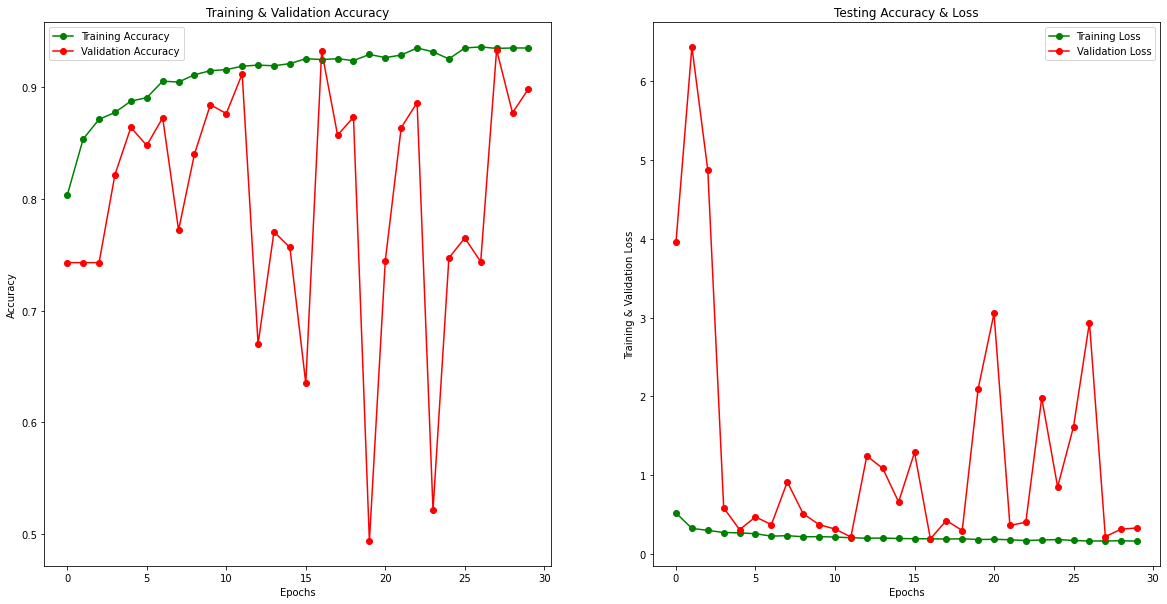

In [31]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [32]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]) #checking the performance of our model
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1])

183/183 [==============================] - 3s 14ms/step - loss: 0.1804 - accuracy: 0.9437
Loss of the model is -  0.1803615689277649
183/183 [==============================] - 2s 14ms/step - loss: 0.1804 - accuracy: 0.9437
Accuracy of the model is -  0.9436643719673157


In [33]:
model.save('Pneumonia.h5')

In [34]:
model.save_weights('Pneumonia_weights.h5')